In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/premiums_young.xlsx')
df.head()


,Unnamed: 0,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,9,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,10,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,16,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,19,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [3]:
df.shape

(20096, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20096 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             20096 non-null  int64 
 1   Age                    20096 non-null  int64 
 2   Gender                 20096 non-null  object
 3   Region                 20096 non-null  object
 4   Marital_status         20096 non-null  object
 5   Number Of Dependants   20096 non-null  int64 
 6   BMI_Category           20096 non-null  object
 7   Smoking_Status         20094 non-null  object
 8   Employment_Status      20095 non-null  object
 9   Income_Level           20092 non-null  object
 10  Income_Lakhs           20096 non-null  int64 
 11  Medical History        20096 non-null  object
 12  Insurance_Plan         20096 non-null  object
 13  Annual_Premium_Amount  20096 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.1+ MB


### Converting columns into consistent naming

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [6]:
df.sample()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
11539,28559,18,Male,Southeast,Unmarried,1,Obesity,Regular,Freelancer,> 40L,59,No Disease,Silver,9328


In [7]:
df.isnull().sum()

unnamed:_0               0
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

### Handle NA values

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

unnamed:_0               0
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,24962.130513,21.494375,0.718019,22.510851,8142.096267
std,14438.360343,2.294052,0.940713,23.420493,2749.906347
min,4.000000,18.000000,-3.000000,1.000000,3501.000000
25%,12350.250000,19.000000,0.000000,6.000000,6022.250000
50%,24903.500000,22.000000,0.000000,16.000000,7939.000000
75%,37404.750000,23.000000,1.000000,31.000000,9561.000000
max,49998.000000,25.000000,3.000000,790.000000,18186.000000


#### max age is 356 and min number_of_dependents are -3 , which is practically impossible.

In [13]:
df[df.number_of_dependants<0]

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
150,402,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
871,2245,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
906,2323,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2462,6162,20,Male,Northeast,Unmarried,-3,Underweight,Regular,Freelancer,10L - 25L,20,Diabetes,Silver,9640
3059,7650,20,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Salaried,> 40L,77,No Disease,Silver,9299
3120,7783,25,Male,Northwest,Unmarried,-1,Underweight,No Smoking,Salaried,10L - 25L,13,No Disease,Bronze,7234
3780,9418,23,Female,Southeast,Unmarried,-3,Normal,Regular,Freelancer,25L - 40L,40,No Disease,Bronze,5003
5593,13821,25,Male,Northwest,Unmarried,-1,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,6299
7585,18844,22,Male,Northwest,Unmarried,-3,Normal,Occasional,Self-Employed,<10L,8,No Disease,Gold,13596
9765,24182,18,Female,Southeast,Unmarried,-1,Underweight,No Smoking,Self-Employed,<10L,4,No Disease,Bronze,9366


In [14]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

#### converting negative values into positive values

In [15]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df.number_of_dependants.describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [16]:
df.age.describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

### Vizualization

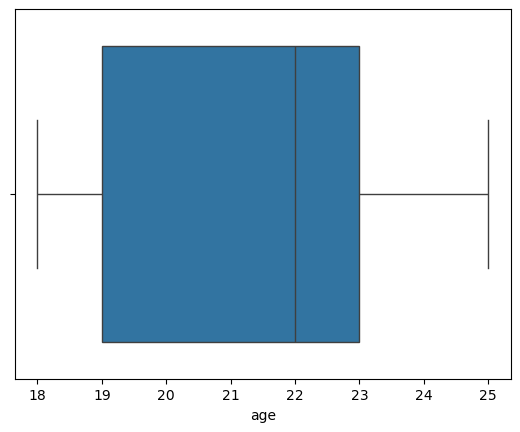

In [17]:
sns.boxplot(x=df['age'])
plt.show()

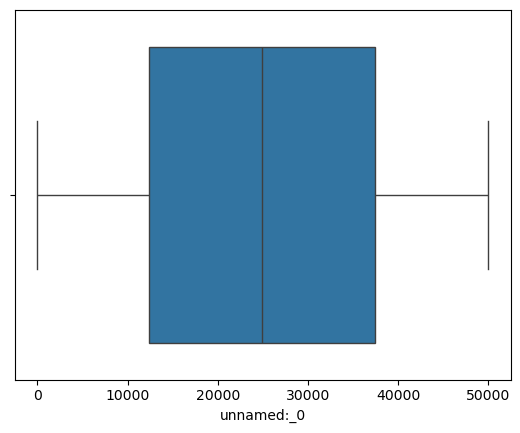

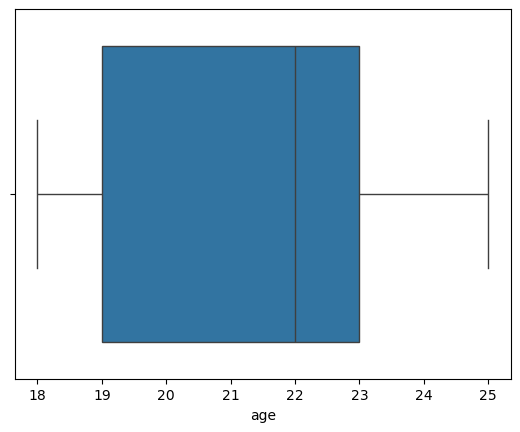

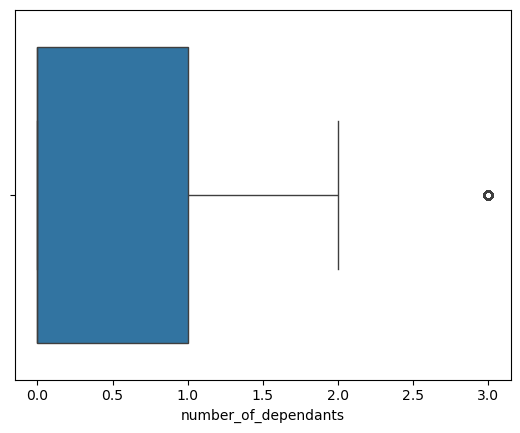

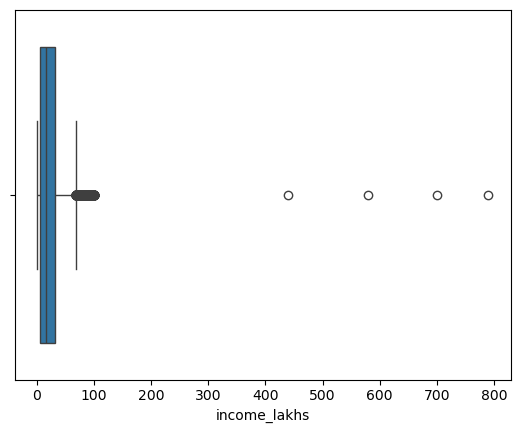

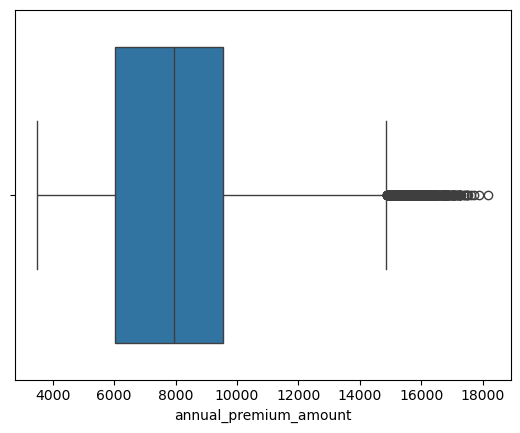

In [18]:
numeric_columns = df.select_dtypes(include=np.number).columns

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()
    

In [19]:
df[df.age>100].shape

(0, 14)

In [20]:
df[df.age>100]['age'].unique()

array([], dtype=int64)

In [21]:
df1 = df[df.age<=100].copy()
df1.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,24962.130513,21.494375,0.722598,22.510851,8142.096267
std,14438.360343,2.294052,0.937200,23.420493,2749.906347
min,4.000000,18.000000,0.000000,1.000000,3501.000000
25%,12350.250000,19.000000,0.000000,6.000000,6022.250000
50%,24903.500000,22.000000,0.000000,16.000000,7939.000000
75%,37404.750000,23.000000,1.000000,31.000000,9561.000000
max,49998.000000,25.000000,3.000000,790.000000,18186.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

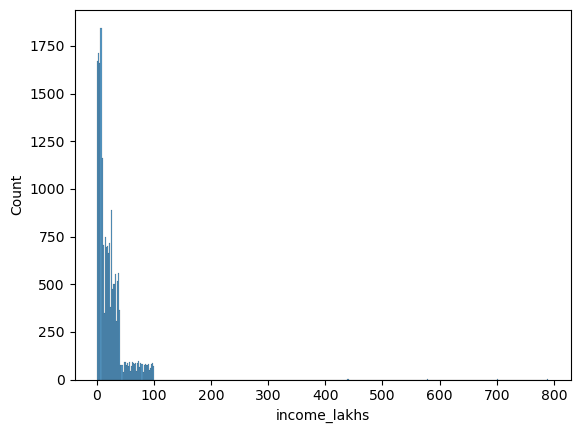

In [22]:
sns.histplot(df1.income_lakhs)

In [23]:
df.income_lakhs.quantile([0.25,0.75])

0.25     6.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [24]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [25]:
get_iqr_bounds(df1.income_lakhs)

(-31.5, 68.5)

In [26]:
df1.income_lakhs.quantile(0.999)

100.0

In [27]:
quantile_threshold = df1.income_lakhs.quantile(0.999)

In [28]:
df1[df1.income_lakhs>quantile_threshold].shape

(4, 14)

In [29]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,24965.022902,21.494474,0.722742,22.390371,8141.799263
std,14438.231315,2.294248,0.937238,21.732062,2749.912486
min,4.000000,18.000000,0.000000,1.000000,3501.000000
25%,12356.500000,19.000000,0.000000,6.000000,6022.000000
50%,24910.500000,22.000000,0.000000,16.000000,7939.000000
75%,37406.500000,23.000000,1.000000,31.000000,9561.000000
max,49998.000000,25.000000,3.000000,100.000000,18186.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

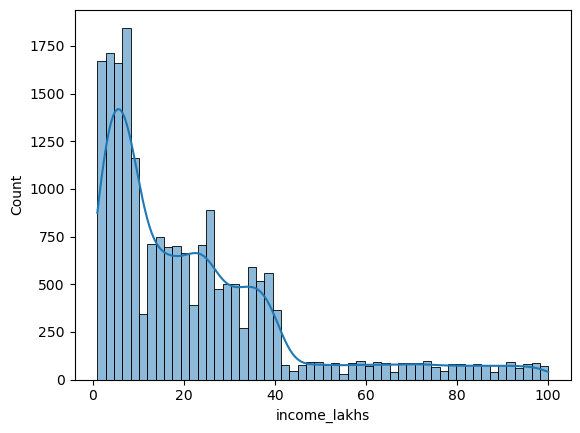

In [30]:
sns.histplot(df2['income_lakhs'], kde=True)

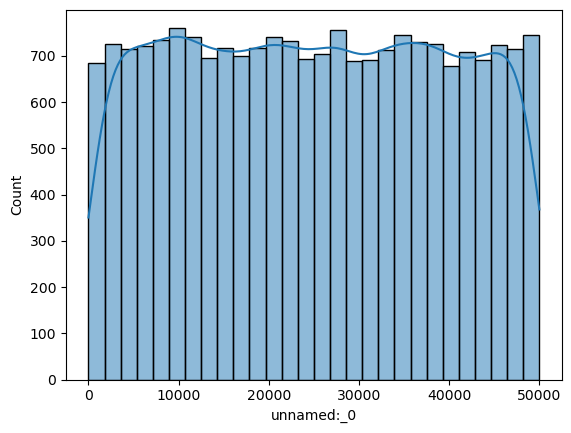

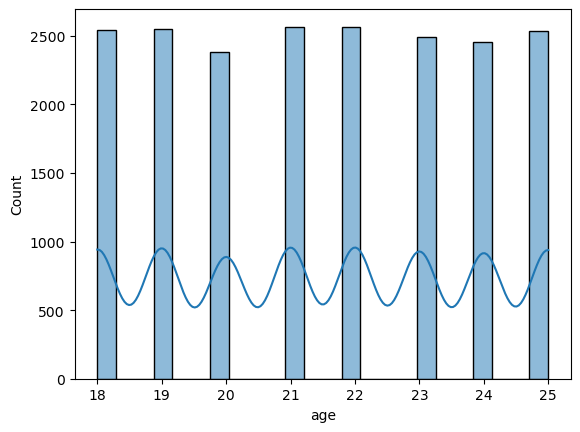

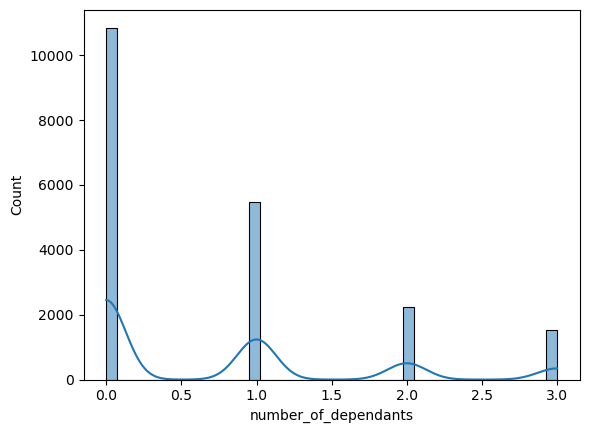

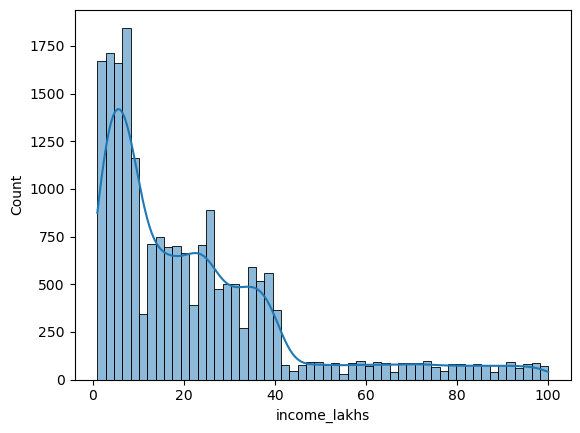

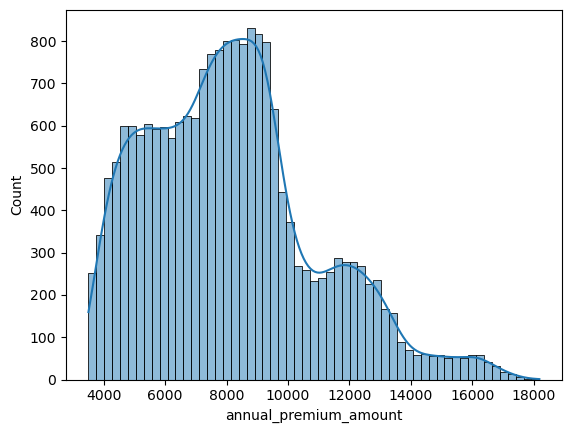

In [31]:
for col in numeric_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

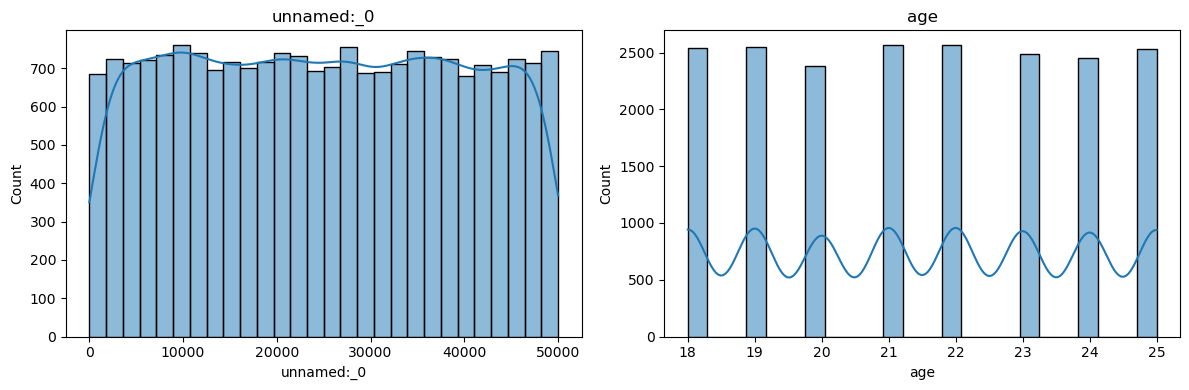

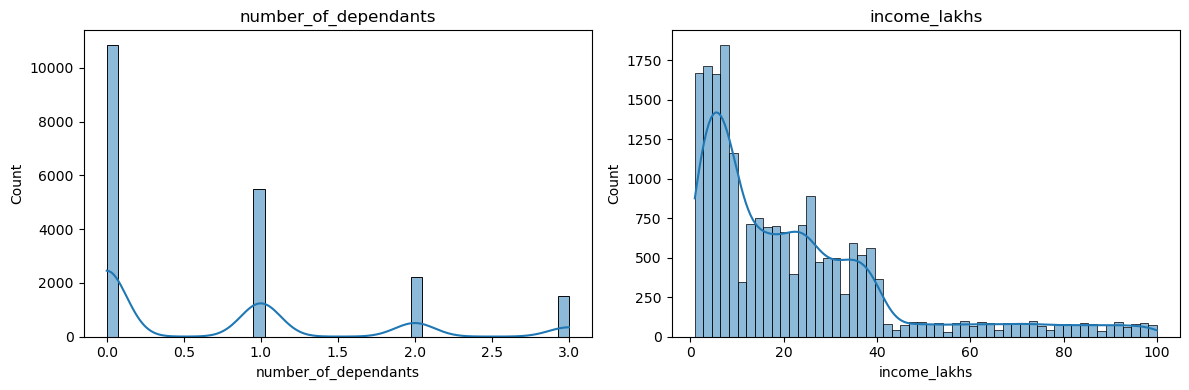

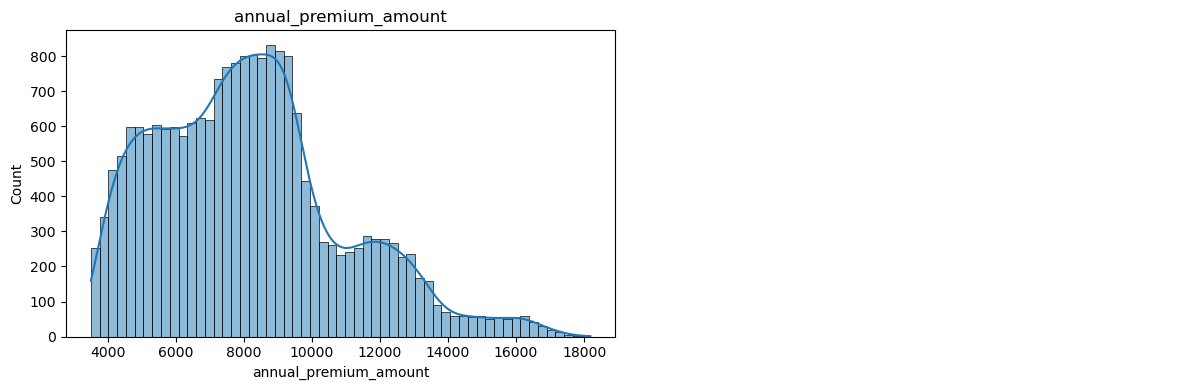

In [32]:
for i in range(0, len(numeric_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # First plot
    sns.histplot(df2[numeric_columns[i]], kde=True, ax=axes[0])
    axes[0].set_title(numeric_columns[i])
    
    # Second plot (check if exists)
    if i + 1 < len(numeric_columns):
        sns.histplot(df2[numeric_columns[i+1]], kde=True, ax=axes[1])
        axes[1].set_title(numeric_columns[i+1])
    else:
        axes[1].axis("off")  # hide empty plot
    
    plt.tight_layout()
    plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

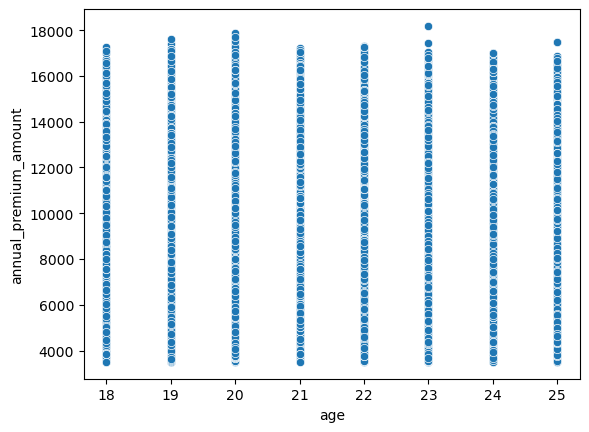

In [33]:
sns.scatterplot(df2, x='age', y='annual_premium_amount')

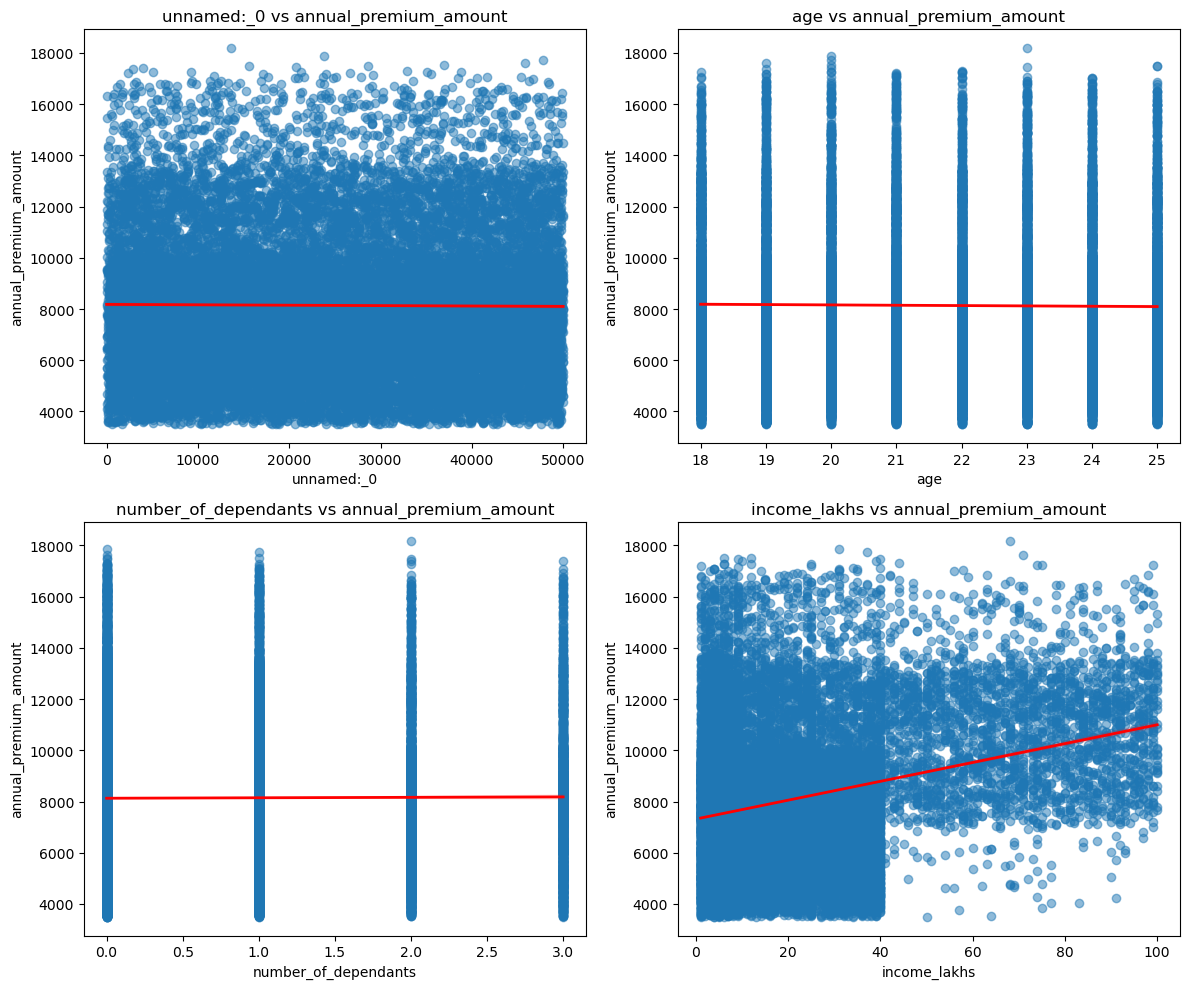

In [34]:

import math

target = 'annual_premium_amount'

# Remove target if it's inside numeric_columns
features = [col for col in numeric_columns if col != target]

n_cols = 2
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.regplot(
        data=df2,
        x=col,
        y=target,
        ax=axes[i],
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    axes[i].set_title(f"{col} vs {target}")

# Hide extra empty plots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [35]:
categorical_columns = df2.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [36]:
for col in categorical_columns:
    print(col , ':', df2[col].unique())
    print('-'*60)

gender : ['Male' 'Female']
------------------------------------------------------------
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
------------------------------------------------------------
marital_status : ['Unmarried' 'Married']
------------------------------------------------------------
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
------------------------------------------------------------
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
------------------------------------------------------------
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
------------------------------------------------------------
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
------------------------------------------------------------
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'T

In [37]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
}, inplace=True)

C:\Users\bansa\AppData\Local\Temp\ipykernel_2380\4234562676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


In [38]:
df2.smoking_status.unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [39]:
for col in categorical_columns:
    print(df2[col].value_counts(normalize=True))
    print('-'*70)

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64
----------------------------------------------------------------------
region
Southeast    0.346958
Southwest    0.304590
Northwest    0.201284
Northeast    0.147167
Name: proportion, dtype: float64
----------------------------------------------------------------------
marital_status
Unmarried    0.899881
Married      0.100119
Name: proportion, dtype: float64
----------------------------------------------------------------------
bmi_category
Normal         0.577467
Underweight    0.222493
Overweight     0.136513
Obesity        0.063527
Name: proportion, dtype: float64
----------------------------------------------------------------------
smoking_status
No Smoking    0.690033
Regular       0.223589
Occasional    0.086379
Name: proportion, dtype: float64
----------------------------------------------------------------------
employment_status
Freelancer       0.500000
Salaried         0.350045
Self-Employed    0

<Axes: xlabel='gender', ylabel='annual_premium_amount'>

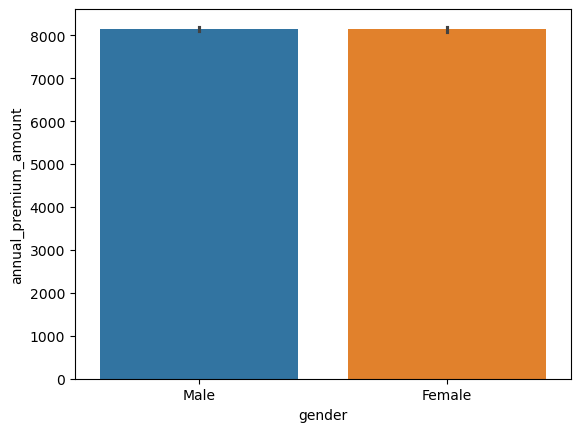

In [40]:
sns.barplot(df2,x='gender', y='annual_premium_amount',hue='gender')

In [41]:
pct_count = df2.gender.value_counts(normalize=True)


<Axes: xlabel='gender'>

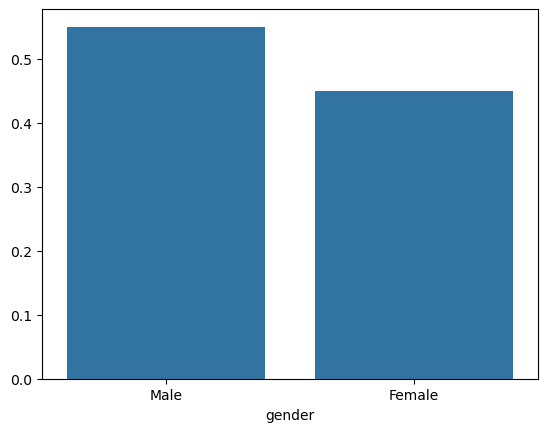

In [42]:
sns.barplot(x=pct_count.index, y=pct_count.values
            )

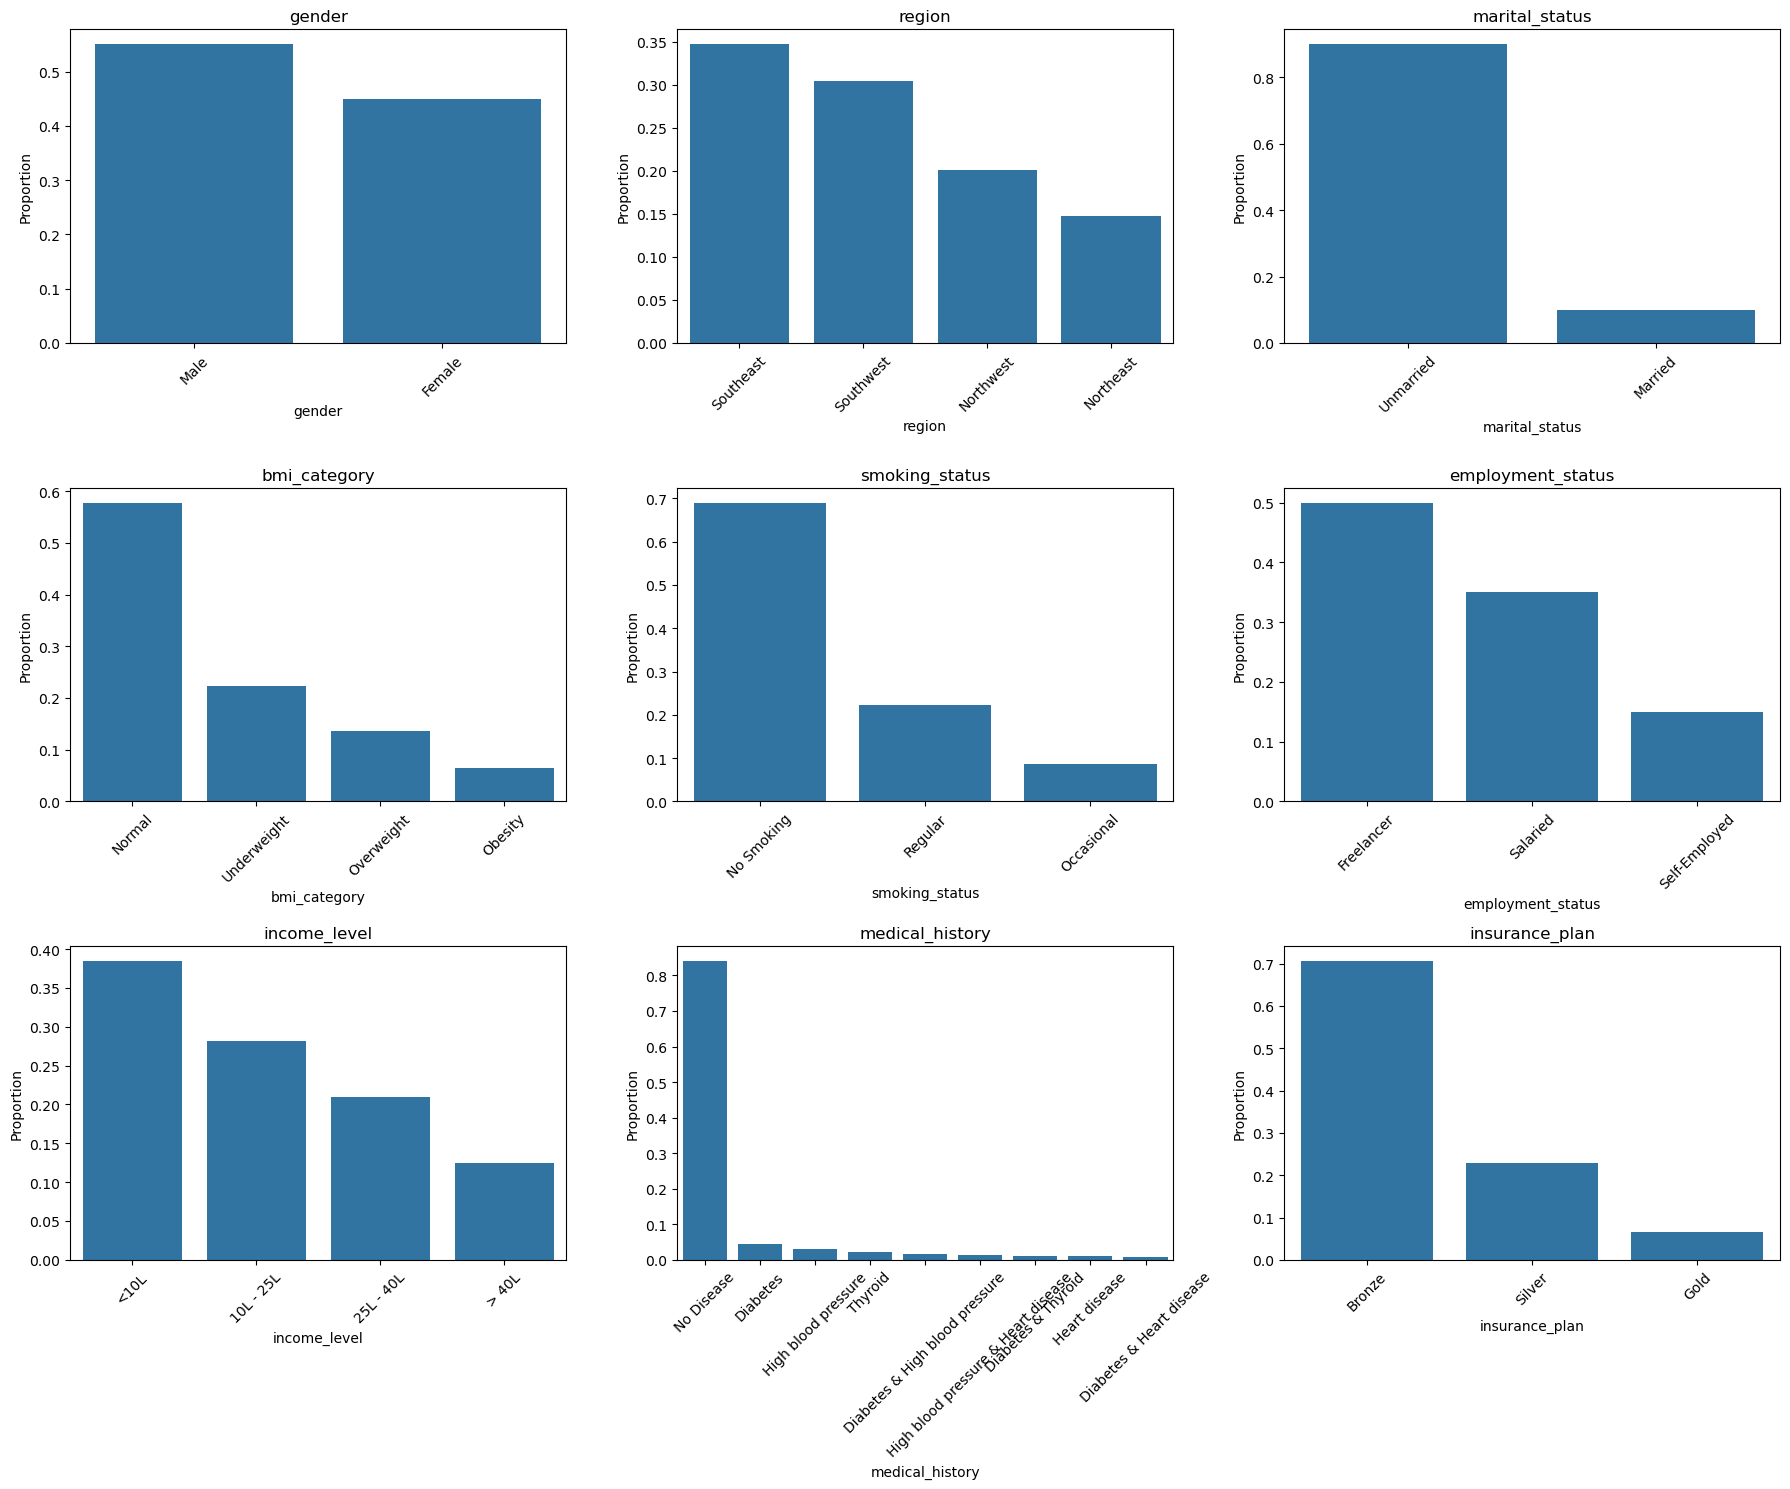

In [43]:
n_cols = 3   # 👈 3 charts per row
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    
    freq = df2[col].value_counts(normalize=True)
    
    sns.barplot(
        x=freq.index,
        y=freq.values,
        ax=axes[i]
    )
    
    axes[i].set_title(col)
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty plots if any
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [44]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab


insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


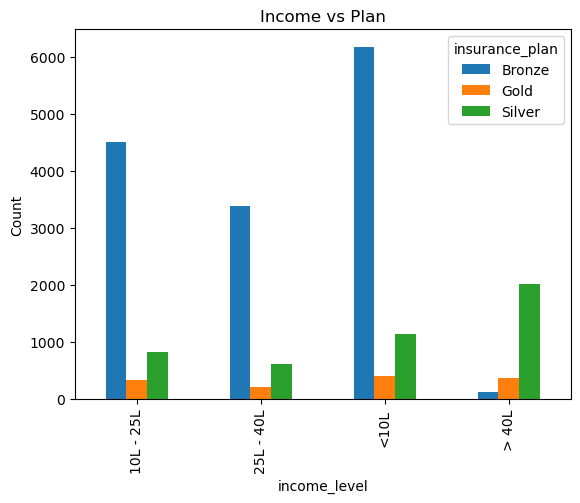

In [45]:
crosstab.plot(kind='bar')
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [46]:
df2.sample()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
11961,29632,23,Male,Northeast,Unmarried,0,Normal,No Smoking,Freelancer,<10L,5,No Disease,Bronze,4315


In [47]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

#### As per domain understanding , we are assigning risk score to diseases

In [48]:
risk_score = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

df2[['disease1','disease2']] = (
    df2.medical_history.str.split('&', expand=True)
    .apply(lambda x: x.str.lower().str.strip())
)

df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)

df2['total_risk_score'] = 0
for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_score)

C:\Users\bansa\AppData\Local\Temp\ipykernel_2380\2481471933.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\bansa\AppData\Local\Temp\ipykernel_2380\2481471933.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [49]:
print(df2[['disease1', 'disease2', 'total_risk_score']].sample(10))

                  disease1 disease2  total_risk_score
15431             diabetes     none                 6
17156           no disease     none                 0
18708           no disease     none                 0
18866  high blood pressure     none                 6
50              no disease     none                 0
4782            no disease     none                 0
6404            no disease     none                 0
7789            no disease     none                 0
10407           no disease     none                 0
10903           no disease     none                 0


In [50]:
max_score = df2.total_risk_score.max()
min_score = df2.total_risk_score.min()

df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.sample(5)

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
8653,21406,25,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,48,No Disease,Silver,9081,no disease,none,0,0.000000
13338,33184,22,Male,Northwest,Unmarried,2,Underweight,Occasional,Salaried,<10L,1,No Disease,Bronze,9591,no disease,none,0,0.000000
8494,20998,23,Female,Southwest,Married,3,Normal,Regular,Salaried,<10L,9,Diabetes,Bronze,8499,diabetes,none,6,0.428571
6791,16822,22,Female,Southeast,Unmarried,1,Normal,No Smoking,Freelancer,10L - 25L,17,Diabetes & High blood pressure,Bronze,10018,diabetes,high blood pressure,12,0.857143
7035,17412,21,Male,Southeast,Unmarried,0,Normal,No Smoking,Salaried,25L - 40L,31,No Disease,Gold,16210,no disease,none,0,0.000000


In [51]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [52]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2.insurance_plan.unique()

array([2, 1, 3], dtype=int64)

In [53]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [54]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})
df2.sample(3)

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
16631,41337,25,Female,Southwest,Unmarried,1,Obesity,Occasional,Salaried,3,39,Diabetes,1,9625,diabetes,none,6,0.428571
18164,45233,22,Male,Northwest,Unmarried,1,Normal,Regular,Salaried,2,16,No Disease,3,11519,no disease,none,0,0.000000
12662,31500,19,Male,Southeast,Unmarried,0,Normal,Regular,Freelancer,4,70,No Disease,2,9345,no disease,none,0,0.000000


In [55]:
df2.columns

Index(['unnamed:_0', 'age', 'gender', 'region', 'marital_status',
       'number_of_dependants', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'income_lakhs', 'medical_history',
       'insurance_plan', 'annual_premium_amount', 'disease1', 'disease2',
       'total_risk_score', 'normalized_risk_score'],
      dtype='object')

In [56]:
nominal_cols = ['gender', 'region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.sample(5)

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
11188,27717,19,0,3,30,No Disease,1,8600,no disease,none,...,1,0,1,0,1,0,0,0,0,0
19898,49563,18,1,2,25,No Disease,1,6469,no disease,none,...,0,1,1,0,0,0,0,0,1,0
10596,26317,20,0,3,39,No Disease,1,5389,no disease,none,...,1,0,1,0,0,0,0,0,0,0
18694,46575,25,3,2,15,No Disease,2,9082,no disease,none,...,0,0,0,1,0,0,0,0,0,0
683,1783,24,1,3,26,No Disease,1,9028,no disease,none,...,0,0,1,0,0,0,0,1,1,0


In [57]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'], axis=1)
df4.sample(5)

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
16951,42160,21,1,1,2,1,8621,0.0,0,0,0,1,1,0,0,0,0,0,0,1
2722,6857,18,0,1,2,1,4883,0.0,0,0,0,1,1,1,0,0,0,0,1,0
9090,22495,20,0,3,28,1,6903,0.0,1,0,1,0,1,0,0,0,0,0,0,1
13706,34082,24,1,1,6,1,8760,0.0,1,0,1,0,1,0,0,0,0,0,1,0
15583,38643,18,1,3,28,1,6884,0.0,1,0,1,0,1,0,0,1,0,0,0,0


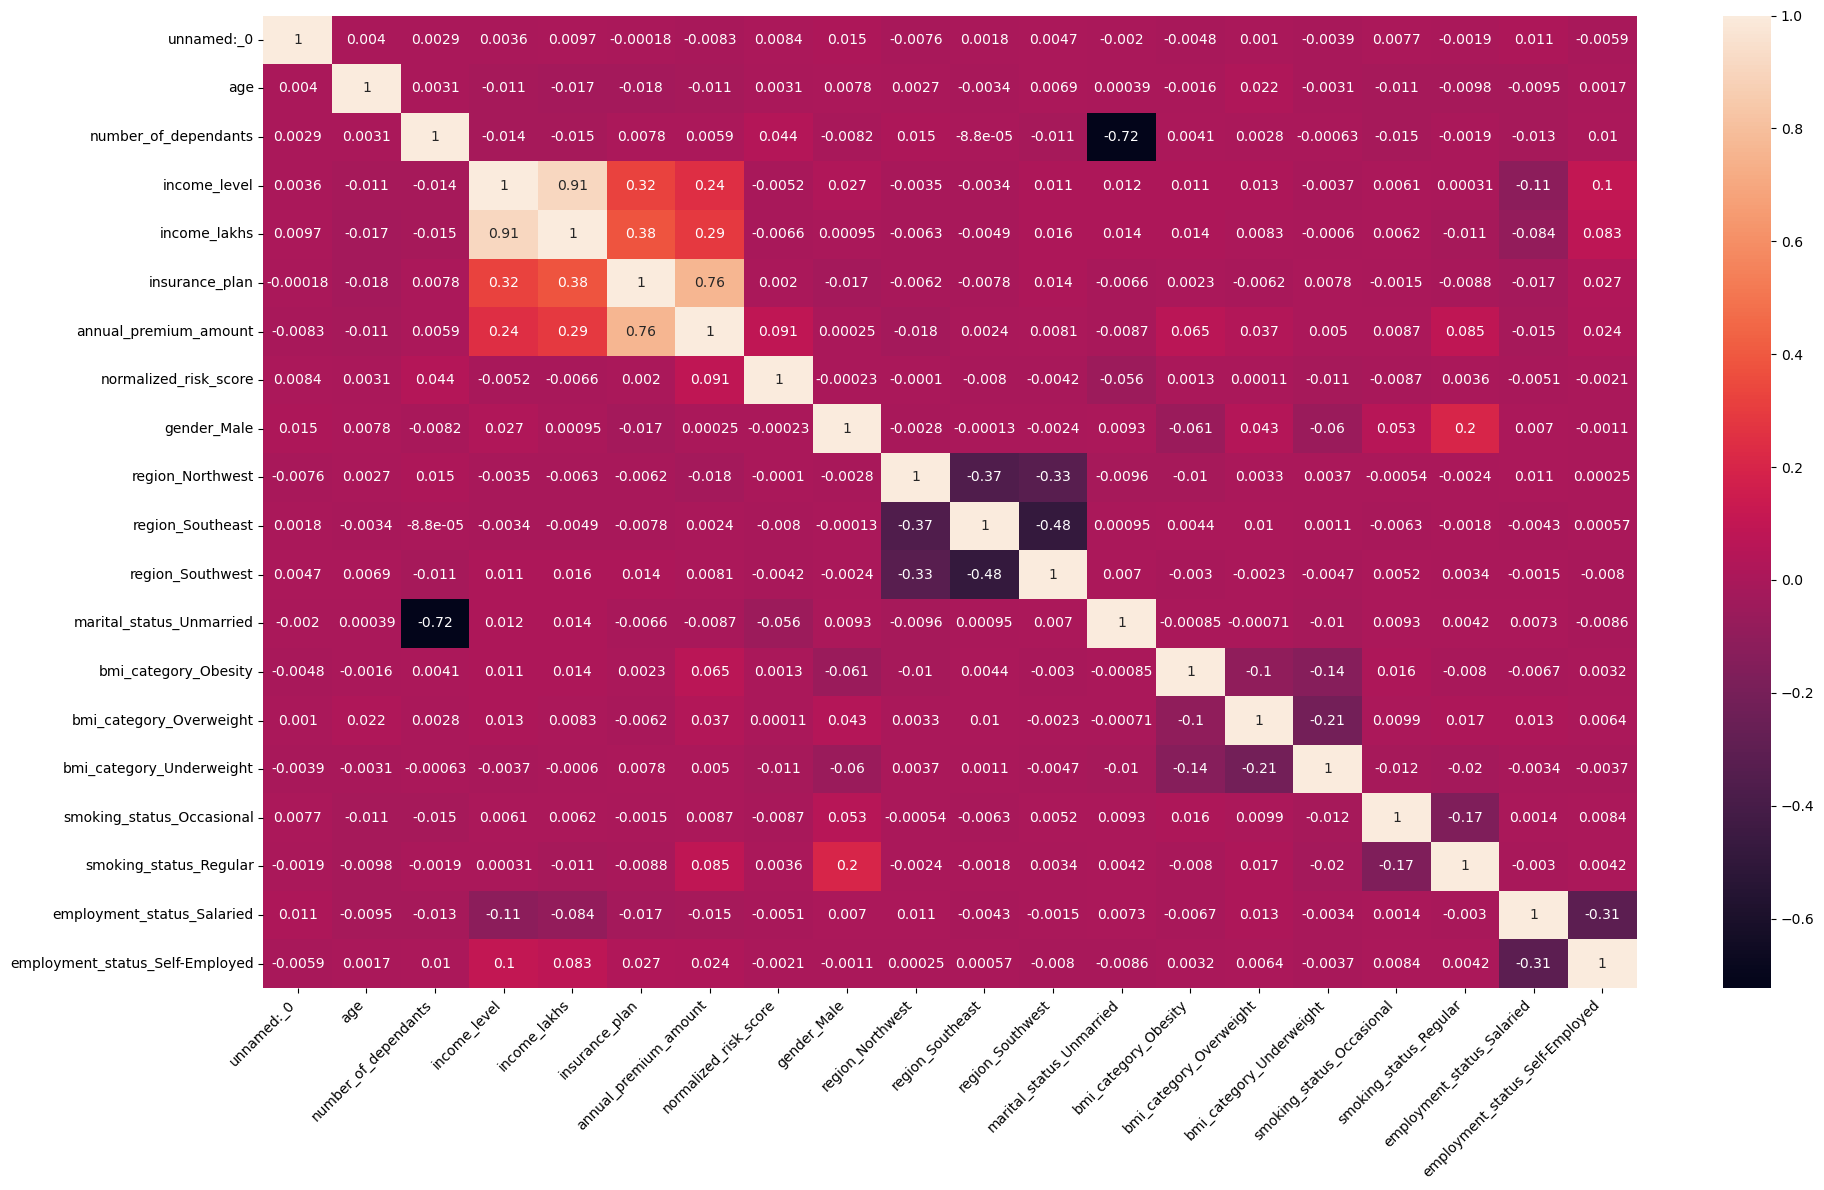

In [58]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Variance Inflation factor

In [59]:
X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_lakhs','insurance_plan']

scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.sample(4)


,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
15728,38977,0.714286,0.000000,1,0.040404,0.5,0.0,1,0,1,0,1,1,0,0,0,0,0,0
4833,11872,0.428571,0.000000,2,0.090909,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0
1716,4310,1.000000,0.000000,2,0.212121,0.0,0.0,0,0,0,0,1,0,1,0,0,0,1,0
12402,30801,0.000000,0.666667,1,0.000000,0.5,0.0,0,0,0,1,1,0,0,0,0,0,0,0


In [60]:
X.describe()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,24965.022902,0.499211,0.240914,2.073982,0.216064,0.179578,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,14438.231315,0.327750,0.312413,1.042442,0.219516,0.300051,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12356.500000,0.142857,0.000000,1.000000,0.050505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24910.500000,0.571429,0.000000,2.000000,0.151515,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37406.500000,0.714286,0.333333,3.000000,0.303030,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,49998.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [62]:
calculate_vif(X)

,Column,VIF
0,unnamed:_0,3.760365
1,age,3.183378
2,number_of_dependants,2.141953
3,income_level,24.794191
4,income_lakhs,10.925632
5,insurance_plan,1.590243
6,normalized_risk_score,1.156825
7,gender_Male,2.335371
8,region_Northwest,2.191027
9,region_Southeast,3.046976


In [63]:
calculate_vif(X.drop('income_level', axis=1))

,Column,VIF
0,unnamed:_0,3.732685
1,age,3.155160
2,number_of_dependants,1.957493
3,income_lakhs,2.296401
4,insurance_plan,1.587874
5,normalized_risk_score,1.155393
6,gender_Male,2.306849
7,region_Northwest,2.159676
8,region_Southeast,2.994911
9,region_Southwest,2.753184


In [64]:
X_reduced = X.drop('income_level', axis=1)
X_reduced.head()

,unnamed:_0,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,4,0.000000,0.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,9,0.571429,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,10,0.428571,0.000000,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,16,1.000000,0.000000,0.141414,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,19,0.285714,0.666667,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


## Model Training

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)
print('X_train:', X_train.shape)
print('X_test:',X_test.shape)
print('y_train:', y_train.shape)
print('y_test:',y_test.shape)

X_train: (14060, 18)
X_test: (6026, 18)
y_train: (14060,)
y_test: (6026,)


In [66]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_score_lr = model_lr.score(X_train, y_train)
test_score_lr = model_lr.score(X_test,y_test)
train_score_lr, test_score_lr

(0.6023184295282523, 0.6041501846953206)

In [67]:
from sklearn.metrics import mean_squared_error
y_pred  = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> \nMSE: ", mse_lr ,"\nRMSE: ", rmse_lr)

Linear Regression ==> 
MSE:  3010299.0702506197 
RMSE:  1735.0213457622415


In [68]:
model_lr.coef_

array([-3.14376184e-03,  5.47149668e+01, -1.45334800e+02, -3.51840424e+01,
        6.99946136e+03,  1.11509009e+03,  1.07417832e+01, -1.15343278e+02,
       -3.69265148e+01, -6.73419148e+01, -5.79178061e+01,  7.92770745e+02,
        4.36080630e+02,  1.68553090e+02,  2.46507051e+02,  6.18454731e+02,
       -1.17029220e+01, -5.40677423e+00])

## Feature Importance

In [69]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df

,Coefficients
unnamed:_0,-0.003144
age,54.714967
number_of_dependants,-145.334800
income_lakhs,-35.184042
insurance_plan,6999.461355
normalized_risk_score,1115.090090
gender_Male,10.741783
region_Northwest,-115.343278
region_Southeast,-36.926515
region_Southwest,-67.341915


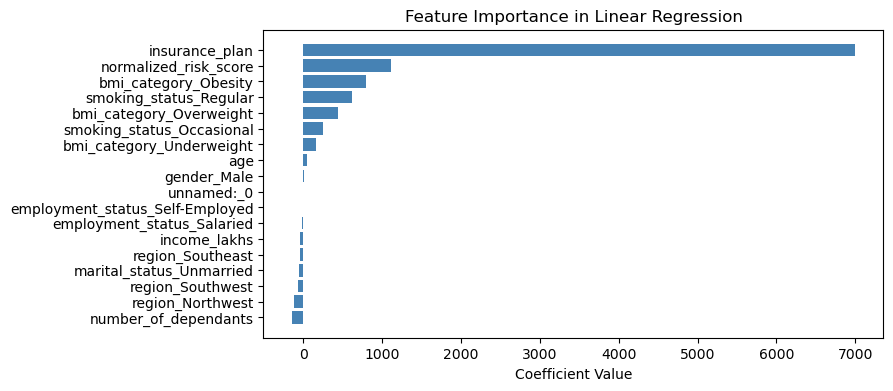

In [70]:
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [71]:
from sklearn.linear_model import Ridge, Lasso

model_rg = Ridge()
model_rg.fit(X_train,y_train)
train_score_rg = model_rg.score(X_train, y_train)
test_score_rg = model_rg.score(X_test,y_test)
train_score_rg, test_score_rg

(0.6023179652741313, 0.6041630376505931)

In [72]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
train_score_xgb = model_xgb.score(X_train, y_train)
test_score_xgb = model_xgb.score(X_test,y_test)
train_score_xgb, test_score_xgb

(0.7558168172836304, 0.5599888563156128)

## Test score for xgb model is 56% , which is very less. Here we are choosing Linear Regression because it is easy to interpret.

In [93]:
best_model = model_lr

## Error Analysis

In [94]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
    
})
results_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6602.654434,364.654434,5.845695
14758,9462,7078.112618,-2383.887382,-25.194329
13205,5152,7025.001385,1873.001385,36.354841
14278,6988,7890.550438,902.550438,12.915719
19351,4917,6622.257211,1705.257211,34.680846


<Axes: xlabel='diff_pct', ylabel='Count'>

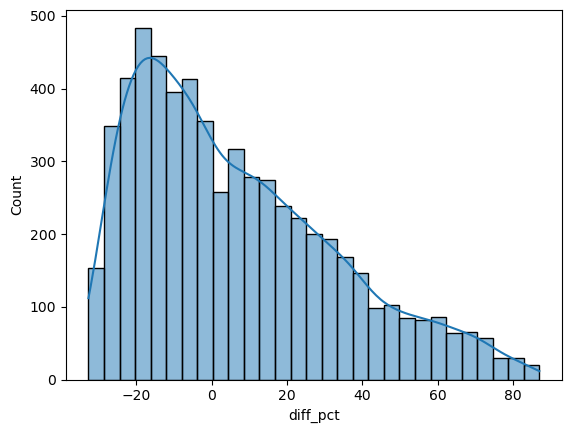

In [95]:
sns.histplot(results_df['diff_pct'], kde=True)

In [96]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]

In [97]:
extreme_results_df.shape , results_df.shape

((4390, 4), (6026, 4))

In [107]:
extreme_errors_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_errors_pct

72.85097909060737

In [99]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct', ascending=False)

,actual,predicted,diff,diff_pct
3652,3536,6609.803343,3073.803343,86.928828
42,3602,6692.330203,3090.330203,85.794842
4169,3517,6533.396941,3016.396941,85.766191
10288,3623,6727.578632,3104.578632,85.690826
386,3578,6643.880317,3065.880317,85.686985
...,...,...,...,...
12652,4435,6660.060813,2225.060813,50.170481
8612,4270,6411.856980,2141.856980,50.160585
9244,4303,6460.158950,2157.158950,50.131512
15489,4299,6452.908508,2153.908508,50.102547


<Axes: xlabel='income_lakhs', ylabel='Count'>

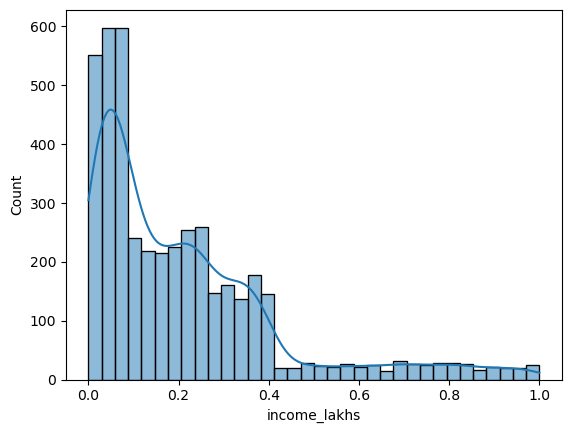

In [100]:
extreme_errors_df = X_test.loc[extreme_results_df.index]

sns.histplot(extreme_errors_df.income_lakhs, kde=True)


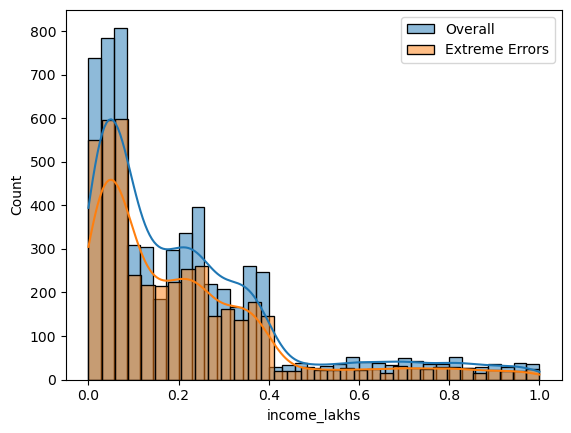

In [101]:
sns.histplot(X_test.income_lakhs, label='Overall', kde=True)
sns.histplot(extreme_errors_df.income_lakhs, label='Extreme Errors', kde=True)
plt.legend()
plt.show()

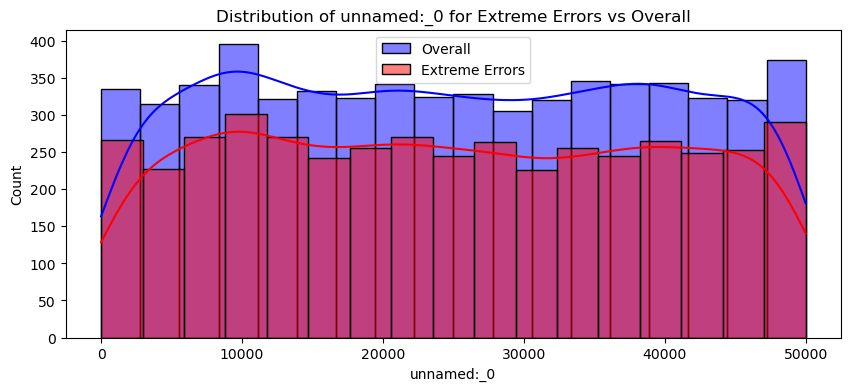

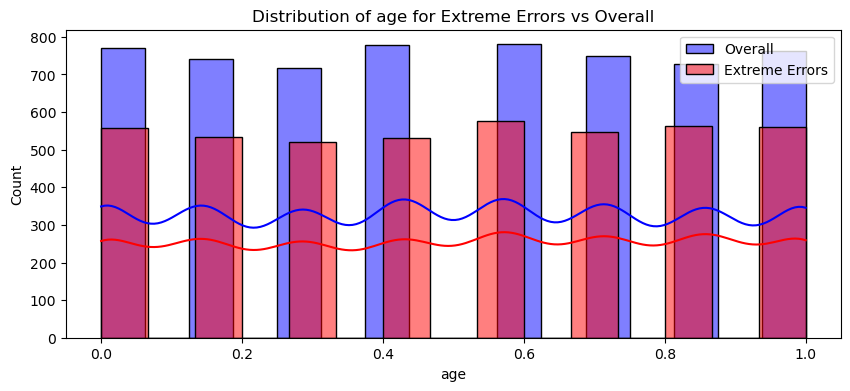

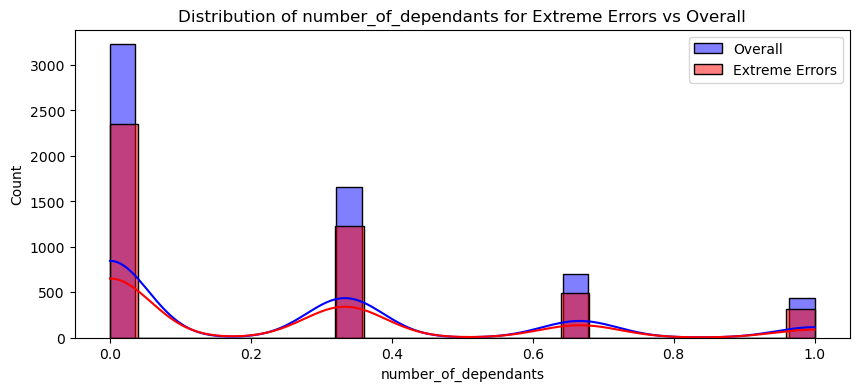

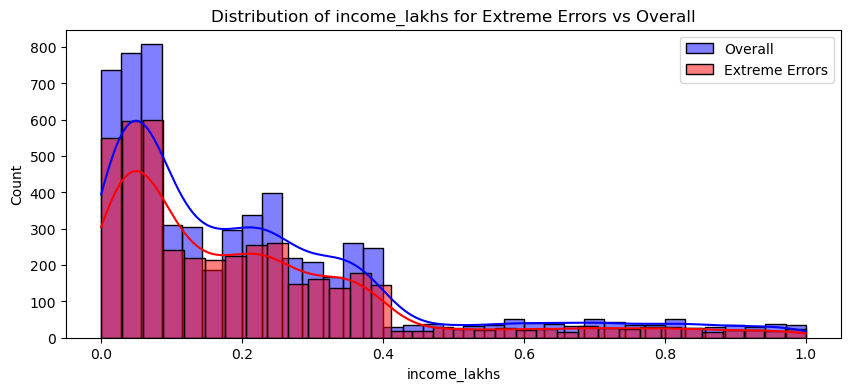

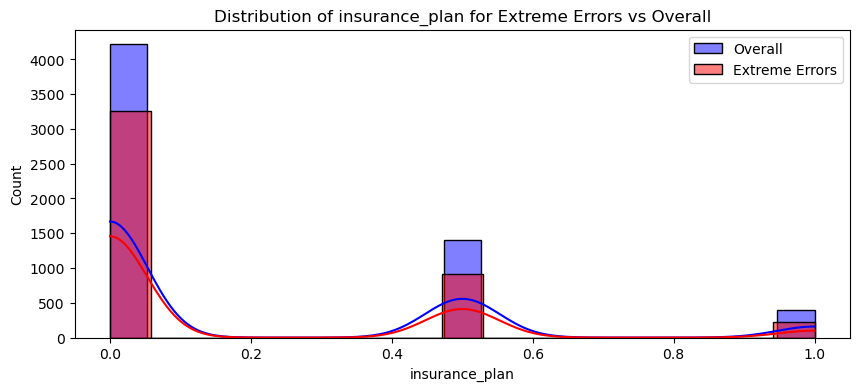

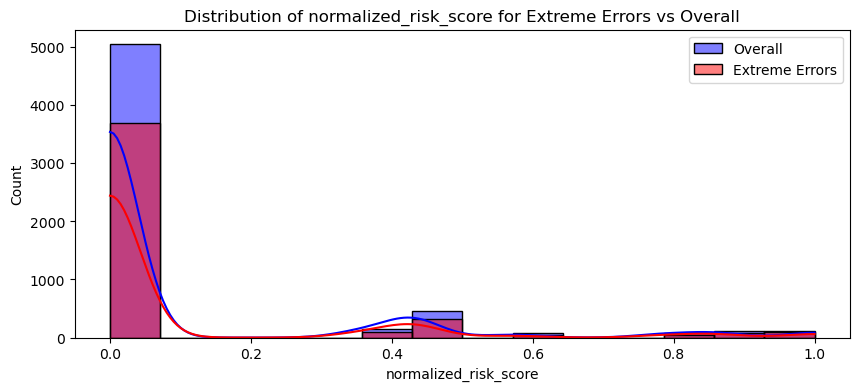

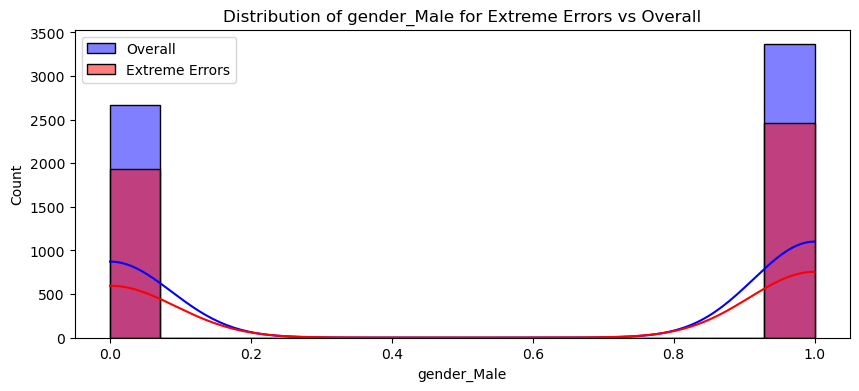

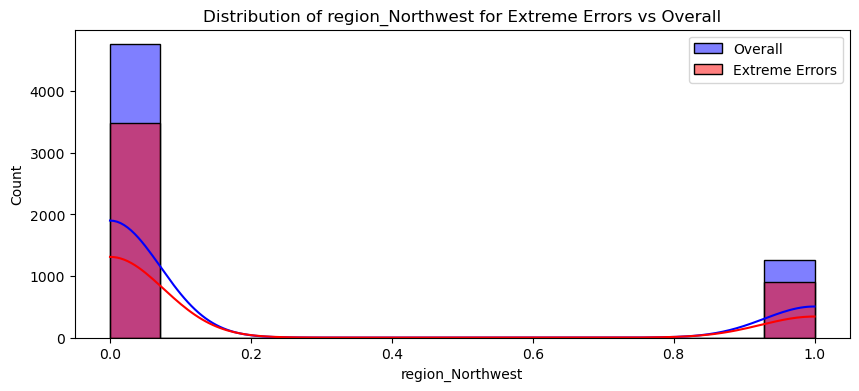

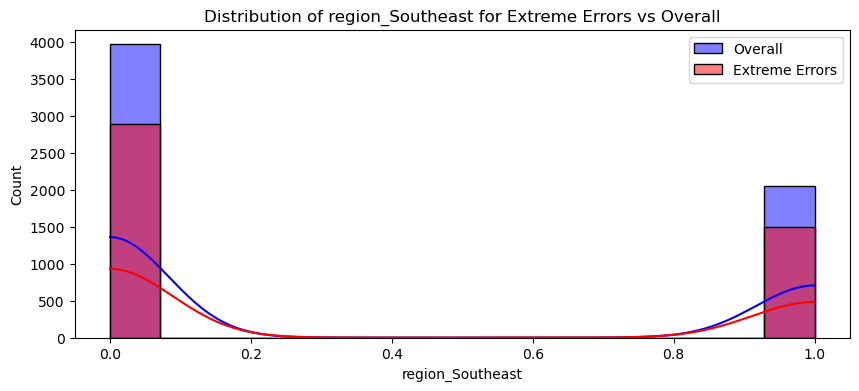

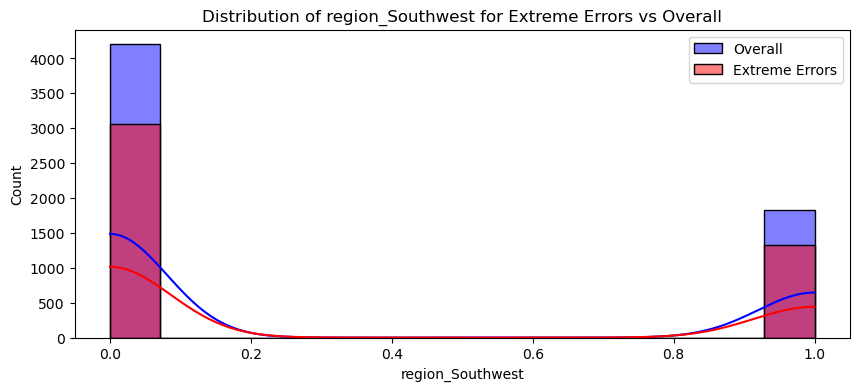

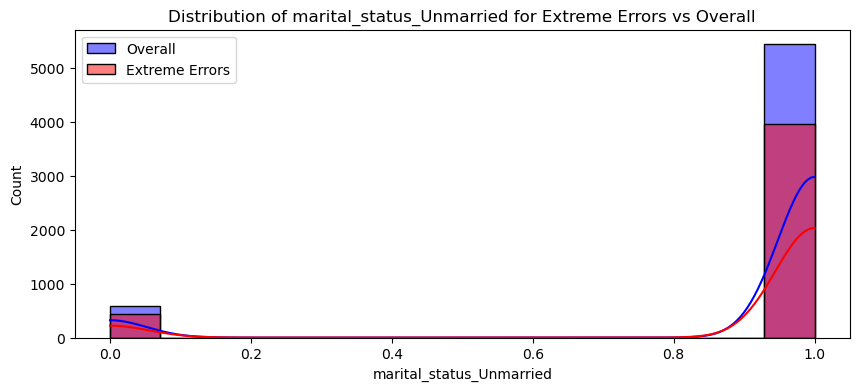

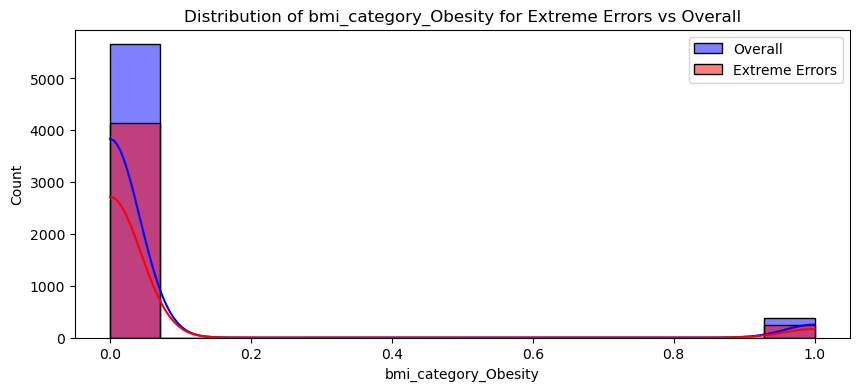

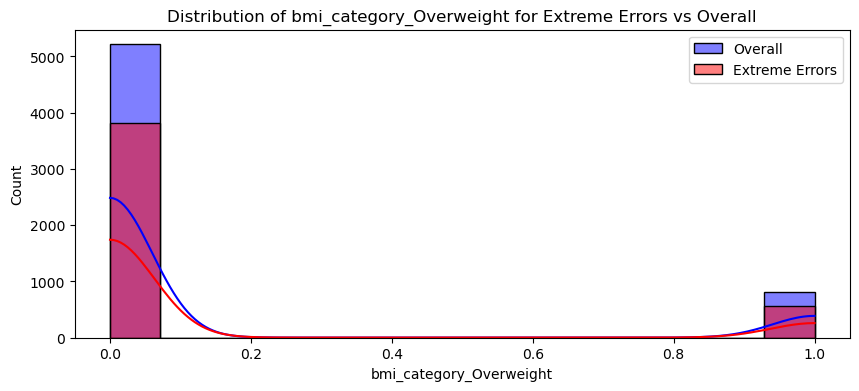

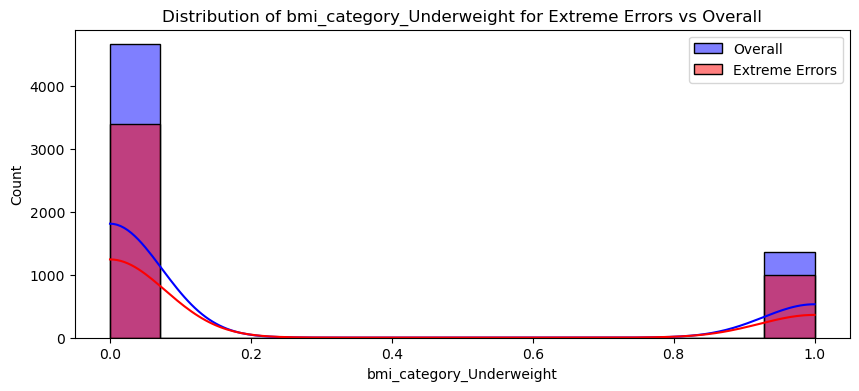

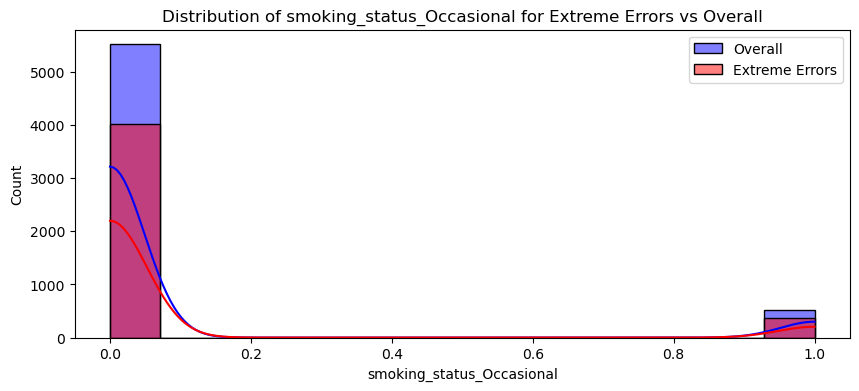

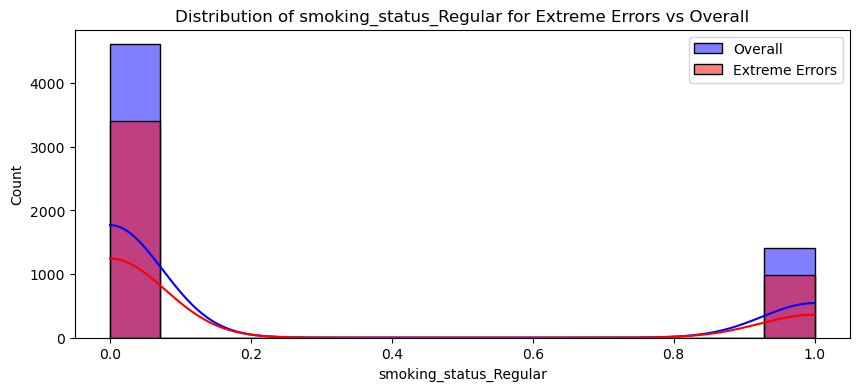

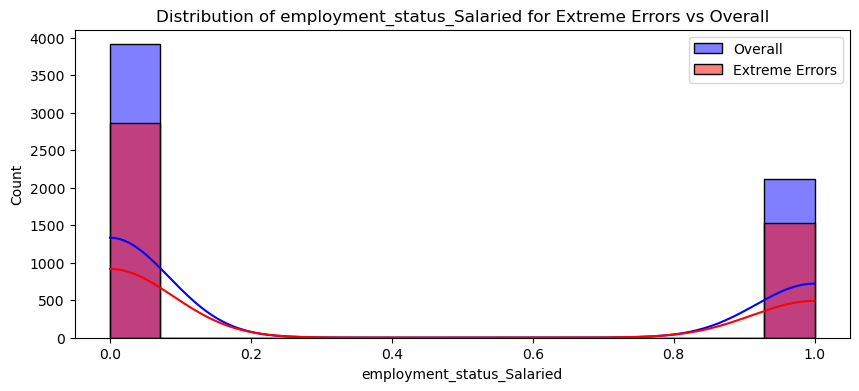

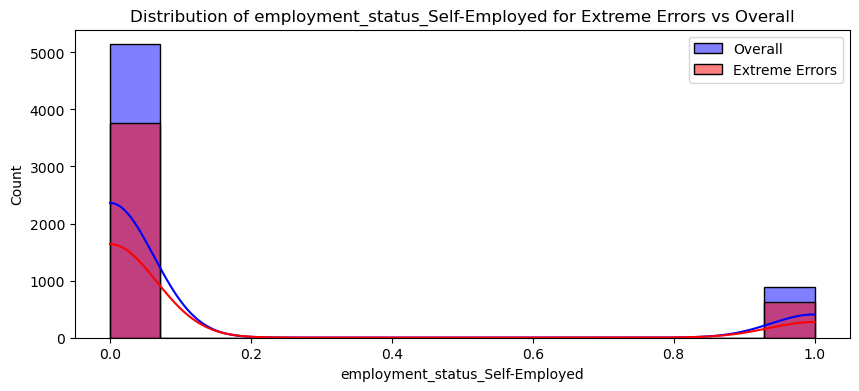

In [102]:
for feature in X_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(X_test[feature], color='blue',label='Overall', alpha=0.5, kde=True)
    sns.histplot(extreme_errors_df[feature],color='red',label='Extreme Errors', kde=True)
    plt.legend()
    plt.title(f"Distribution of {feature} for Extreme Errors vs Overall")
    plt.show()

### Let's investigate age column in detail. because extreme errors are more in lower age group area

In [103]:
extreme_errors_df['income_level'] = -1

In [104]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed


,age,number_of_dependants,income_lakhs,insurance_plan
0,20.0,0.0,7.0,1.0
1,23.0,1.0,15.0,1.0
2,23.0,1.0,23.0,1.0
3,22.0,0.0,11.0,1.0
4,21.0,1.0,6.0,1.0
...,...,...,...,...
4385,19.0,2.0,12.0,1.0
4386,22.0,0.0,35.0,1.0
4387,24.0,1.0,5.0,1.0
4388,18.0,0.0,12.0,2.0


<Axes: xlabel='age', ylabel='Count'>

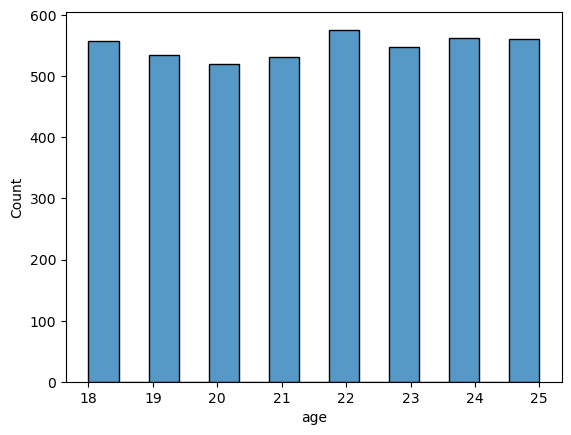

In [105]:
sns.histplot(df_reversed.age)

In [106]:
df_reversed.age.quantile(0.97)

25.0

### 97% data of extreme_errors group , has age group below 25. clearly this age group has some problems. so we will build two models , one for age group below 25 , another for age group above 25.